In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys, os, scipy, sklearn
import sklearn.metrics, sklearn.preprocessing, sklearn.model_selection, sklearn.tree, sklearn.linear_model, sklearn.cluster
from sklearn.model_selection import train_test_split

In [7]:
wisconsin = pd.read_csv('wisconsin.csv')
wisconsin.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
wisconsin['diagnosis'] = np.where(wisconsin['diagnosis'] == 'M', 0, 1)
wisconsin.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
wisconsin.shape

(569, 33)

In [10]:
X = wisconsin[['radius_mean', 'concave points_mean']]
X.head(3)

,radius_mean,concave points_mean
0,17.99,0.14710
1,20.57,0.07017
2,19.69,0.12790


In [11]:
y = wisconsin['diagnosis']
y.head(3)

0    0
1    0
2    0
Name: diagnosis, dtype: int32

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)

In [17]:
SEED = 1

# Train your first classification tree

1. Import DecisionTreeClassifier from sklearn.tree.
2. Instantiate a DecisionTreeClassifier dt of maximum depth equal to 6.
3. Fit dt to the training set.
4. Predict the test set labels and assign the result to y_pred.

In [33]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 1 0 0 0]


## Evaluate the classification tree

1. Import the function accuracy_score from sklearn.metrics.
2. Predict the test set labels and assign the obtained array to y_pred.
3. Evaluate the test set accuracy score of dt by calling accuracy_score() and assign the value to acc.

In [19]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.81


## Logistic regression vs classification tree

1. Import LogisticRegression from sklearn.linear_model.
2. Instantiate a LogisticRegression model and assign it to logreg.
3. Fit logreg to the training set.
4. Review the plot generated by plot_labeled_decision_regions().

**HINT!**

Call .fit() on logreg and pass the training set and labels to fit the logistic regression model.

In [24]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -----------------------------

In [25]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [26]:
import mlxtend.plotting

def plot_labeled_decision_regions(X_test, y_test, clfs):
    
    for clf in clfs:

        mlxtend.plotting.plot_decision_regions(np.array(X_test), np.array(y_test), clf=clf, legend=2)
        
        plt.ylim((0,0.2))

        # Adding axes annotations
        plt.xlabel(X_test.columns[0])
        plt.ylabel(X_test.columns[1])
        plt.title(str(clf).split('(')[0])
        plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


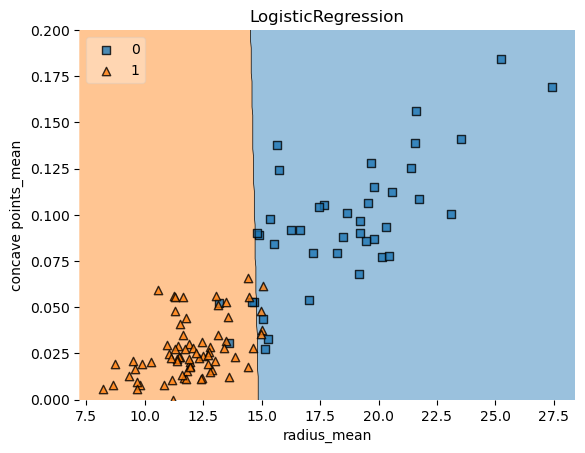

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


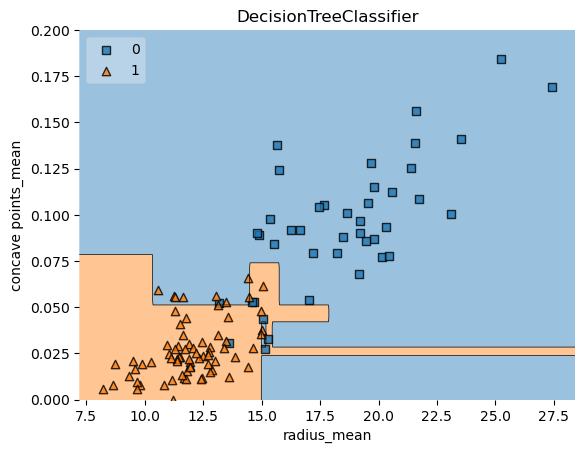

In [27]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

## Using entropy as a criterion

1. Import DecisionTreeClassifier from sklearn.tree.
2. Instantiate a DecisionTreeClassifier dt_entropy with a maximum depth of 8.
3. Set the information criterion to 'entropy'.
4. Fit dt_entropy on the training set.

In [28]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

## Using GINI as a criterion

1. Import DecisionTreeClassifier from sklearn.tree.
2. Instantiate a DecisionTreeClassifier dt_gini with a maximum depth of 8.
3. Set the information criterion to 'gini'.
4. Fit dt_gini on the training set.

In [29]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_gini to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

## Entropy vs Gini index

1. Import accuracy_score from sklearn.metrics.
2. Predict the test set labels of dt_entropy and assign the result to y_pred.
3. Evaluate the test set accuracy of dt_entropy and assign the result to accuracy_entropy.
4. Review accuracy_entropy and accuracy_gini.

In [30]:
y_pred = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred)

In [31]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.8508771929824561
Accuracy achieved by using the gini index:  0.8245614035087719


## Train your first regression tree

1. Import DecisionTreeRegressor from sklearn.tree.
2. Instantiate a DecisionTreeRegressor dt with maximum depth 8 and min_samples_leaf set to 0.13.
3. Fit dt to the training set.

In [34]:
import seaborn as sns

mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [36]:
X = mpg[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']]
y = ['mpg']

In [38]:
OneHotEncoder = sklearn.preprocessing.OneHotEncoder()
OneHotEncodings = OneHotEncoder.fit_transform(mpg[['origin']]).toarray()
OneHotEncodings = pd.DataFrame(OneHotEncodings,
                               columns = ['origin_'+header for header in OneHotEncoder.categories_[0]])

X = X.drop(columns = 'origin').reset_index(drop=True)
X = pd.concat((X,OneHotEncodings),axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape,y_train.shape)

ValueError: Found input variables with inconsistent numbers of samples: [398, 1]

In [45]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

## Evaluate the regression tree

1. Import the function mean_squared_error as MSE from sklearn.metrics.
2. Predict the test set labels and assign the output to y_pred.
3. Compute the test set MSE by calling MSE and assign the result to mse_dt.
4. Compute the test set RMSE and assign it to rmse_dt.

In [44]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.44
